In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import MO

import holidays 
belgium_holidays = holidays.BE()

In [4]:
consumption = pd.read_pickle(r'C:\Thesis\data\data2021\per_day\READING_2021_Consumption_per_day.pkl')
unique_ID = np.unique(list(consumption.index.get_level_values('EAN_ID')))
#Add the sum per day as a column
consumption['Sum'] = consumption.sum(axis=1)
unstacked = consumption['Sum'].unstack(level=0)
unstacked['Average'] = unstacked.mean(axis=1)
unstacked.head()

EAN_ID,1,2,3,4,5,6,7,8,9,11,...,91,92,93,94,95,96,97,98,99,Average
date,,,,,,,,,,,,,,,,,,,,,
2021-01-01,18.511,2.583,2.257,42.947,18.578,10.889,14.000,10.082,21.400,9.905,...,7.790,9.273,32.135,7.716,7.437,12.874,28.160,7.578,18.014,16.045576
2021-01-02,17.975,2.426,2.307,52.551,24.726,13.426,17.675,13.559,20.116,11.043,...,8.596,9.749,27.694,10.113,8.503,15.616,17.516,4.990,22.275,18.231087
2021-01-03,10.967,2.657,2.494,51.822,18.692,11.423,12.989,13.164,21.874,8.408,...,15.905,8.551,17.222,10.868,8.684,13.731,12.221,3.968,27.354,20.063912
2021-01-04,21.675,6.631,2.589,42.948,14.818,8.965,13.548,11.018,22.532,15.790,...,21.901,7.031,28.460,6.567,8.479,18.876,12.168,4.061,38.288,19.272548
2021-01-05,18.368,8.175,2.550,53.583,20.303,12.717,9.172,9.686,29.689,16.124,...,17.196,7.342,22.638,6.678,10.456,15.990,8.456,4.343,30.509,18.798054


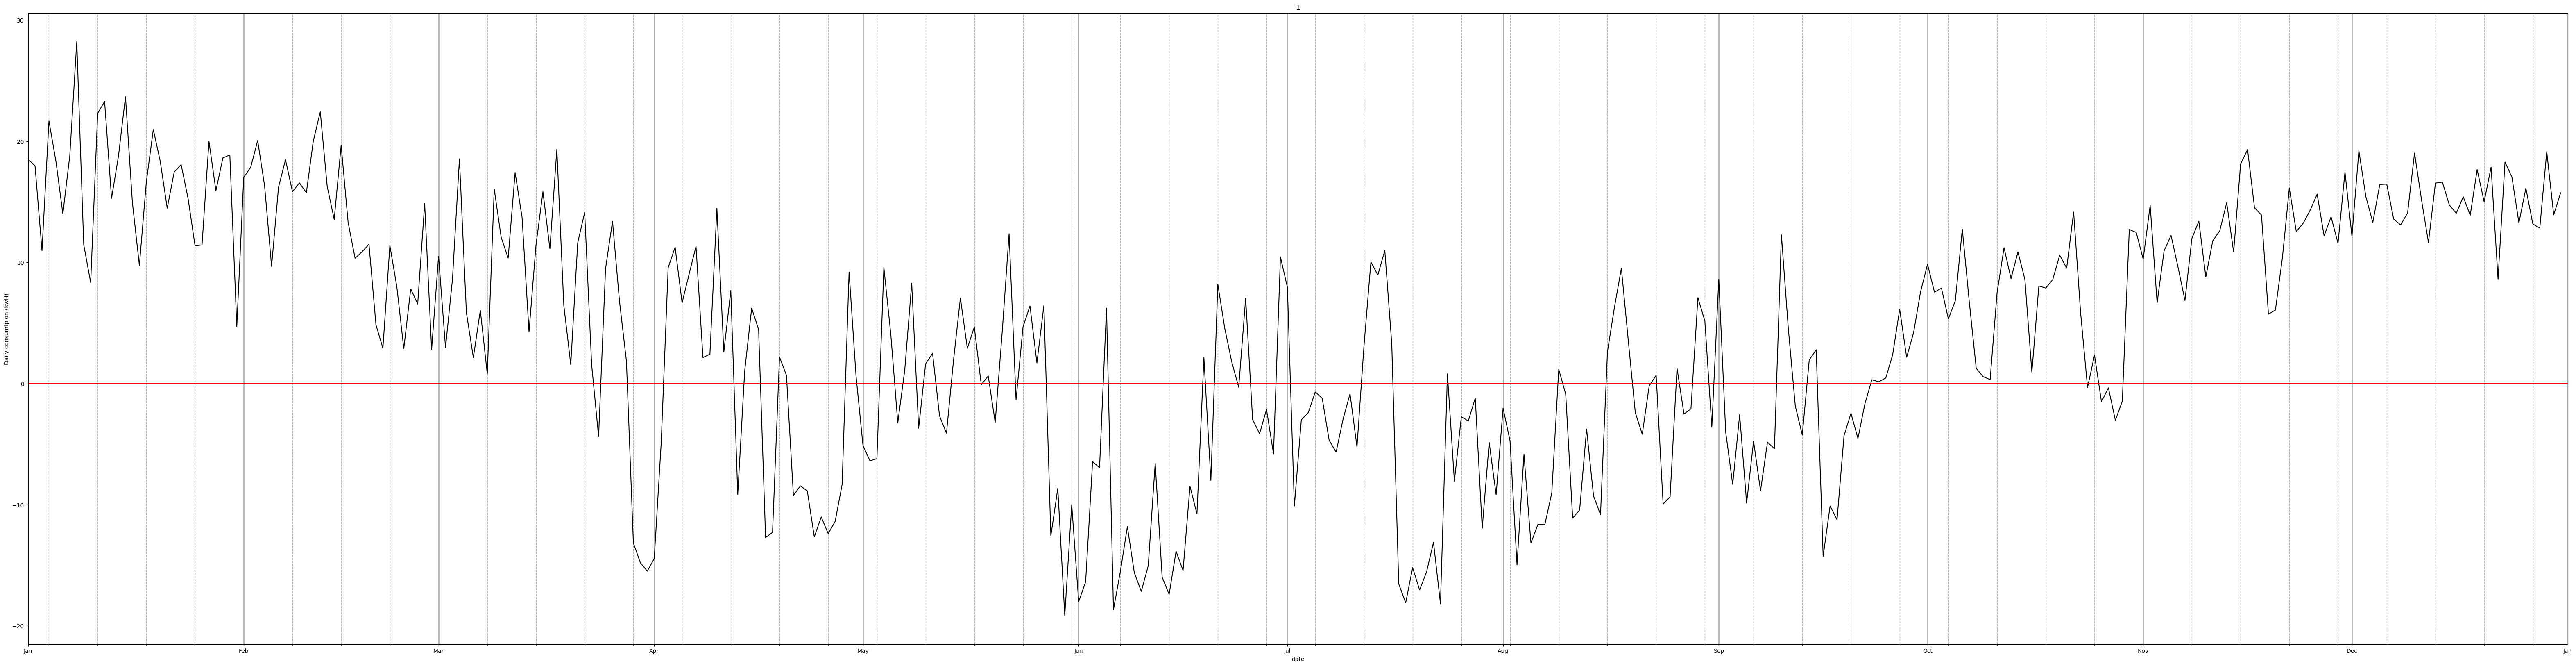

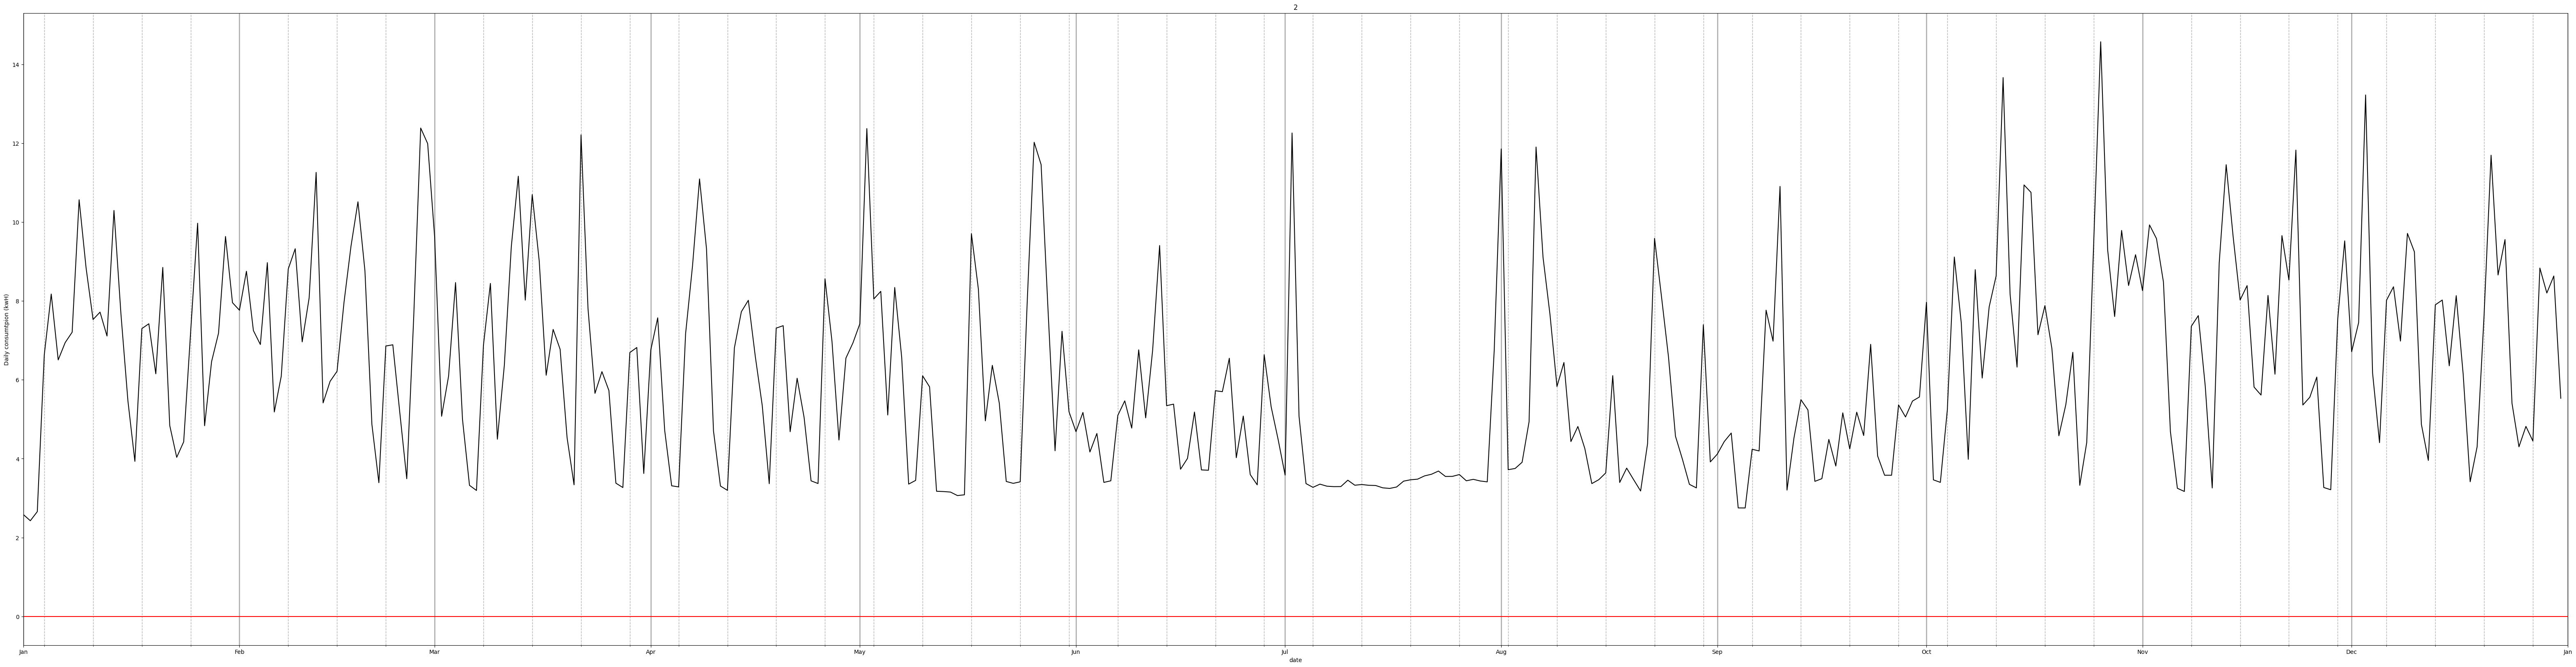

In [5]:
i = 0
# tick on mondays every week
woc = matplotlib.dates.WeekdayLocator(byweekday=MO)
moc = matplotlib.dates.MonthLocator()
for id in unique_ID[0:2]:
    fig, ax = plt.subplots(1, 1)
    unstacked[id].plot(ax = ax, figsize=(80,20),color='black')
    ax.set_ylabel('Daily consumtpion (kwH)')
    ax.xaxis.set_major_locator(moc)
    ax.xaxis.set_minor_locator(woc)
    ax.xaxis.grid(True, 'major', linestyle='-', linewidth=2)
    ax.xaxis.grid(True, 'minor', linestyle='--', linewidth=1)
    ax.set_xlim(['2021-01-01','2022-01-01'])
    ax.set_title(id)
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
    # ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%M'))
    ax.axhline(y = 0, color = 'red')
    #fig.savefig('../data/dailyConsumption_per_id/'+id.replace('/','-')+'.png')


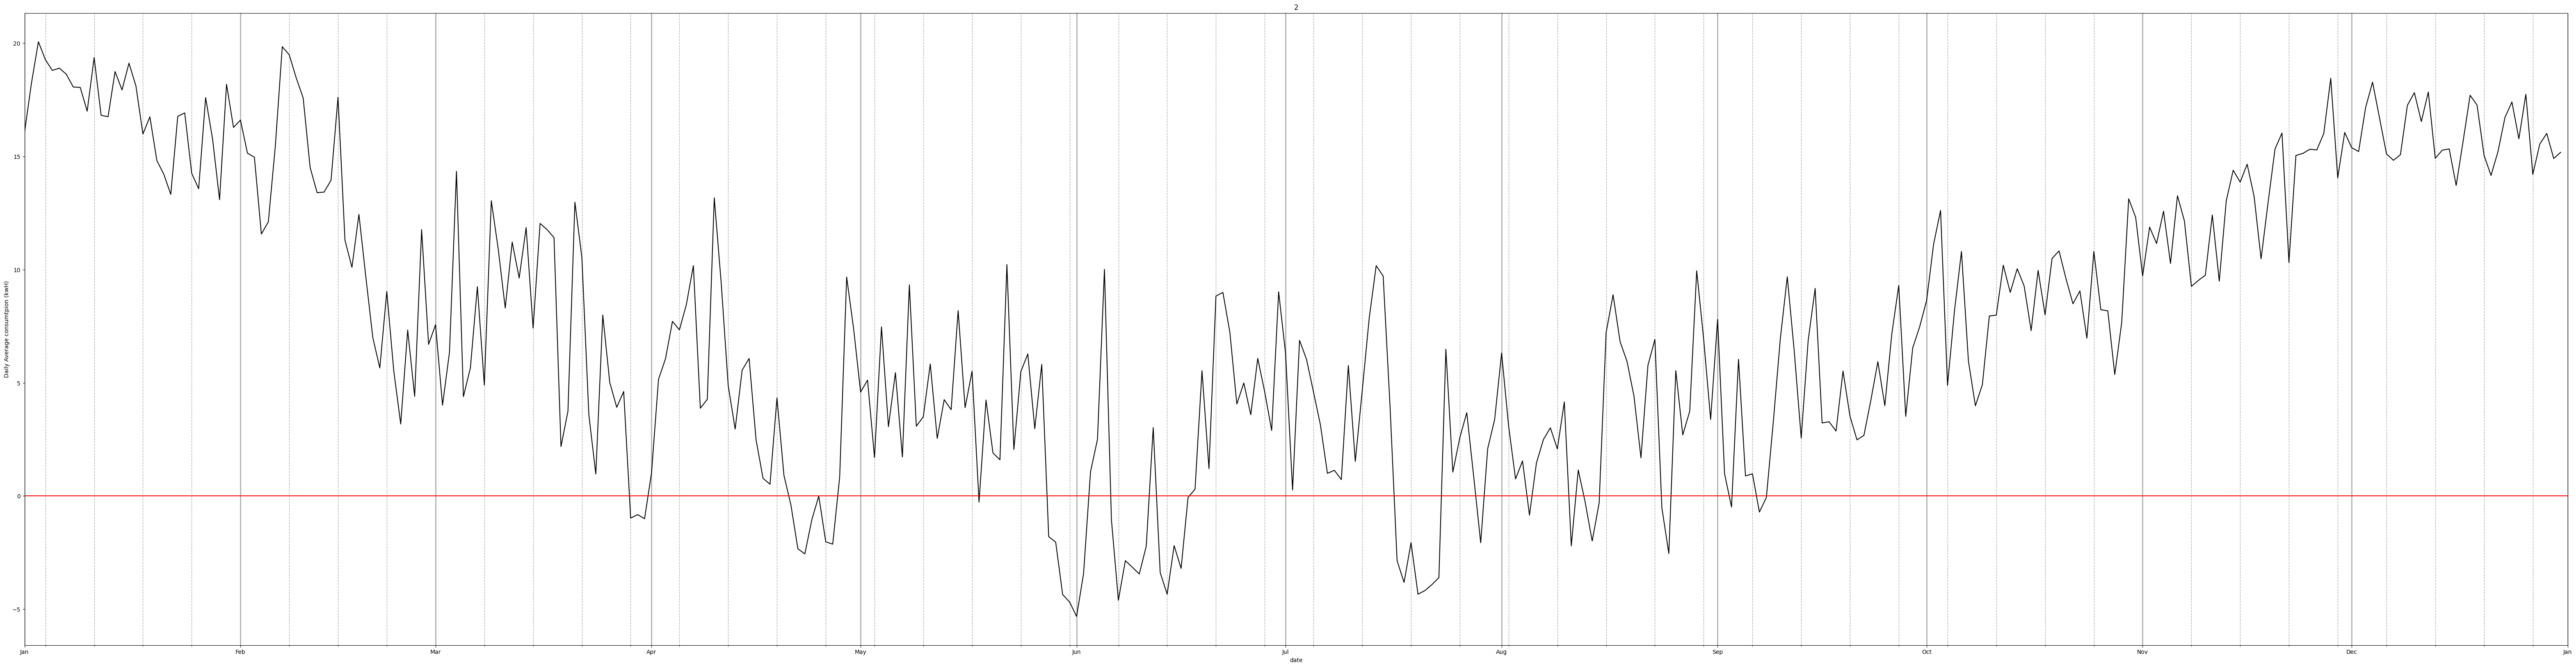

In [6]:
# tick on mondays every week
woc = matplotlib.dates.WeekdayLocator(byweekday=MO)
moc = matplotlib.dates.MonthLocator()
fig, ax = plt.subplots(1, 1)
unstacked['Average'].plot(ax = ax, figsize=(80,20),color='black')
ax.set_ylabel('Daily Average consumtpion (kwH)')
ax.xaxis.set_major_locator(moc)
ax.xaxis.set_minor_locator(woc)
ax.xaxis.grid(True, 'major', linestyle='-', linewidth=2)
ax.xaxis.grid(True, 'minor', linestyle='--', linewidth=1)
ax.set_xlim(['2021-01-01','2022-01-01'])
ax.set_title(id)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%b'))
# ax.xaxis.set_minor_formatter(matplotlib.dates.DateFormatter('%M'))
ax.axhline(y = 0, color = 'red')
fig.savefig('../../data/average_daily_injection2021.png')